# Effects of Students Familiarity in Different Math Concepts on Thier Math Grades


## Dataset Overview
This document explore a dataset that is a world wide study developed by OEDC organization which examines the skills of 15-year-old school students around the world. The study assesses students’ skills in mathematics, science, and reading. It also contains a wealth of information on students’ background, their school and the organisation of education systems.The PISA 2012 dataset contains data on 485,490 pupils and about 600 columns.

## Investigation Overview
In this dataset, I’m going to explore how familiarity with different math concepts may affect the math grade. Also, I’m going to investigate if other variables like OUTHOURS (Out-of-School Study Time) and  ESCS (Index of economic, social and cultural status) have a relationship with familiarity level with different math concepts in addition to the math grade. 
Lastly, I’d like to investigate familiarity level with math grade and ESCS for five countries close to my country. These countries are (Tunisia, Jordan, Qatar, Israel, Turkey, United Arab Emirates)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

sb.set_style("white")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Variable
pisa_data = "pisa2012_modified.csv"
fm_math_data = "familierity_with_math.csv"
pisa_dictionary = "pisadict2012_sub.csv" 
df_pisa = pd.read_csv(pisa_data)


## Distribution of Math Grades

Students' math grades have normal distribution,  most of students marks are between 350 - 525

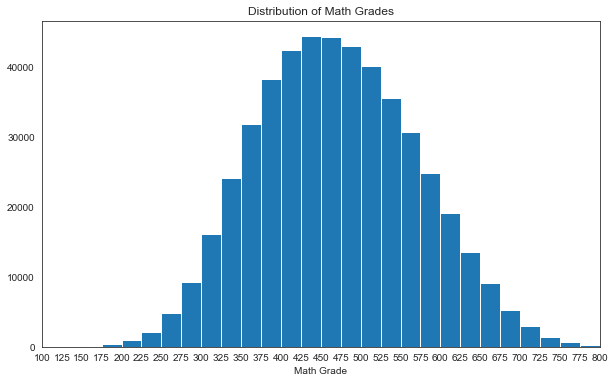

In [3]:
binsize =25
bins = np.arange(100, df_pisa['PVMATH'].max()+binsize, binsize)
plt.figure(figsize=[10, 6])
plt.hist(data = df_pisa, x = 'PVMATH', bins=bins)
plt.xlabel('Math Grade')
plt.title('Distribution of Math Grades')
plt.xticks(bins)
plt.xlim([100,800])
plt.show()


## Distribution of OUTHOURS, FAMCON,  ESCS

OUTHOURS(Out-of-School Study Time)is right skewed distribution. The histogram chart shows that 6 hour is the most frequent study hours after school. 

For familiarity with mathematical concepts index, most of students have 14 degree. 


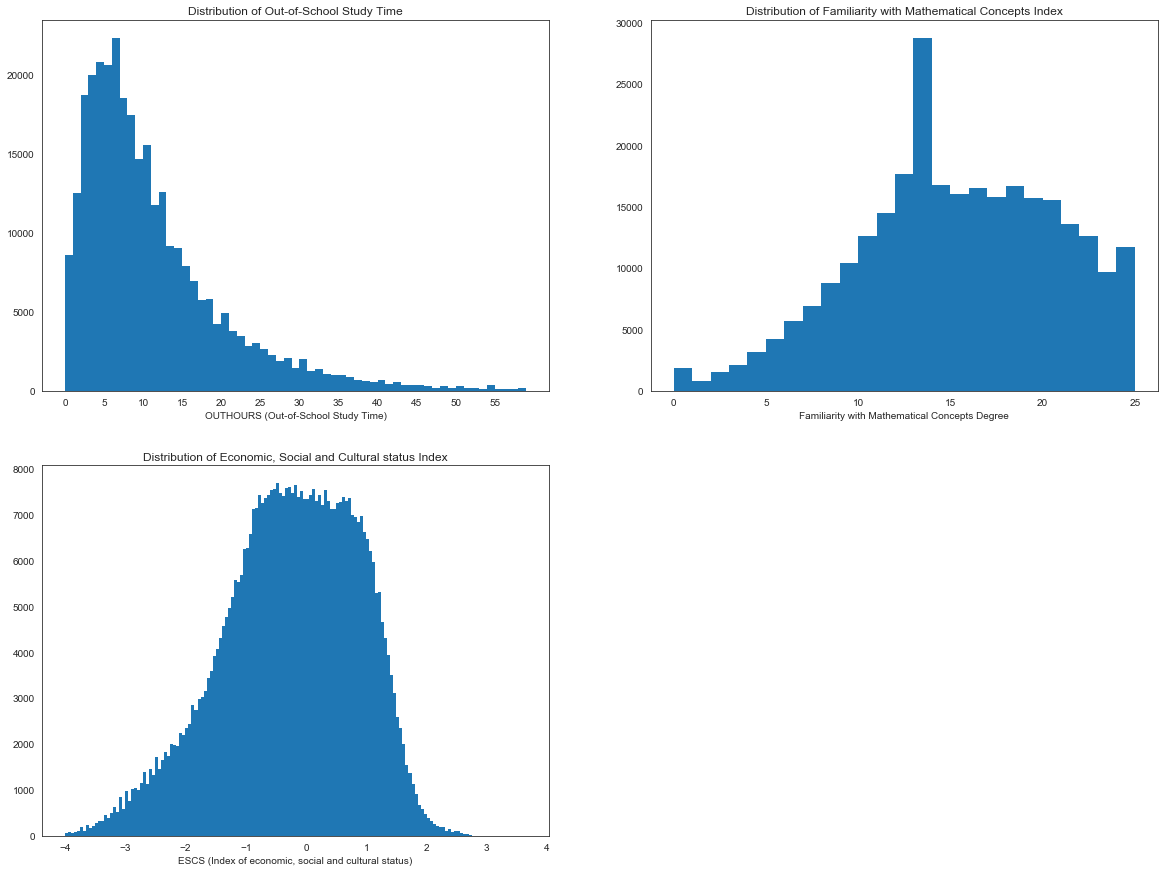

In [4]:
fig, axs = plt.subplots(2, 2,figsize=(20, 15))


bin_edges = np.arange(0, 60, 1)
axs[0,0].hist(data=df_pisa, x='OUTHOURS',bins=bin_edges,edgecolor = "none")
axs[0,0].set_xlabel("OUTHOURS (Out-of-School Study Time)")
axs[0,0].set_xticks(np.arange(0, 60, 5))
axs[0,0].set_title("Distribution of Out-of-School Study Time")

bin_edges = np.arange(0, df_pisa['fm_degree_total'].max(), 1)
axs[0,1].hist(data=df_pisa, x='fm_degree_total', bins=bin_edges,edgecolor = "none")
axs[0,1].set_xlabel("Familiarity with Mathematical Concepts Degree")
axs[0,1].set_title("Distribution of Familiarity with Mathematical Concepts Index")



bin_edges = np.arange(-4, df_pisa['ESCS'].max(), .05)
axs[1,0].hist(data = df_pisa, x = 'ESCS', bins=bin_edges,edgecolor = "none")
axs[1,0].set_title("Distribution of Economic, Social and Cultural status Index")
axs[1,0].set_xlabel("ESCS (Index of economic, social and cultural status)")

fig.delaxes(axs[1,1])

## Math Grade vs. OUTHOURS, ESCS, and Familiarity with Math concepts

From the visualization we see the following: 
* There is almost no correlation between OUTHOURS and PVMATH
* There is a moderate correlation between PVMATH and (ESCS,Familiarity with Math Concepts)

Since I have a strong interset in investigating how familiarity with different math concepts may affect the math grade, I'd like to go deeply there and look at the most familiar subject among students, and see if OUTHOURS and ESCS may affect the familiarity and at the same time may affect the PVMATH. 

Again from the above we see that there is a moderate positive relationship between PVMATH and Familiarity with Math Concepts. 


(Out-of-School Study Time): 0.024213414192731993
(Familiarity with Mathematical Concepts) 0.4198500413647081
(Index of economic, social and cultural status): 0.41056996653744404


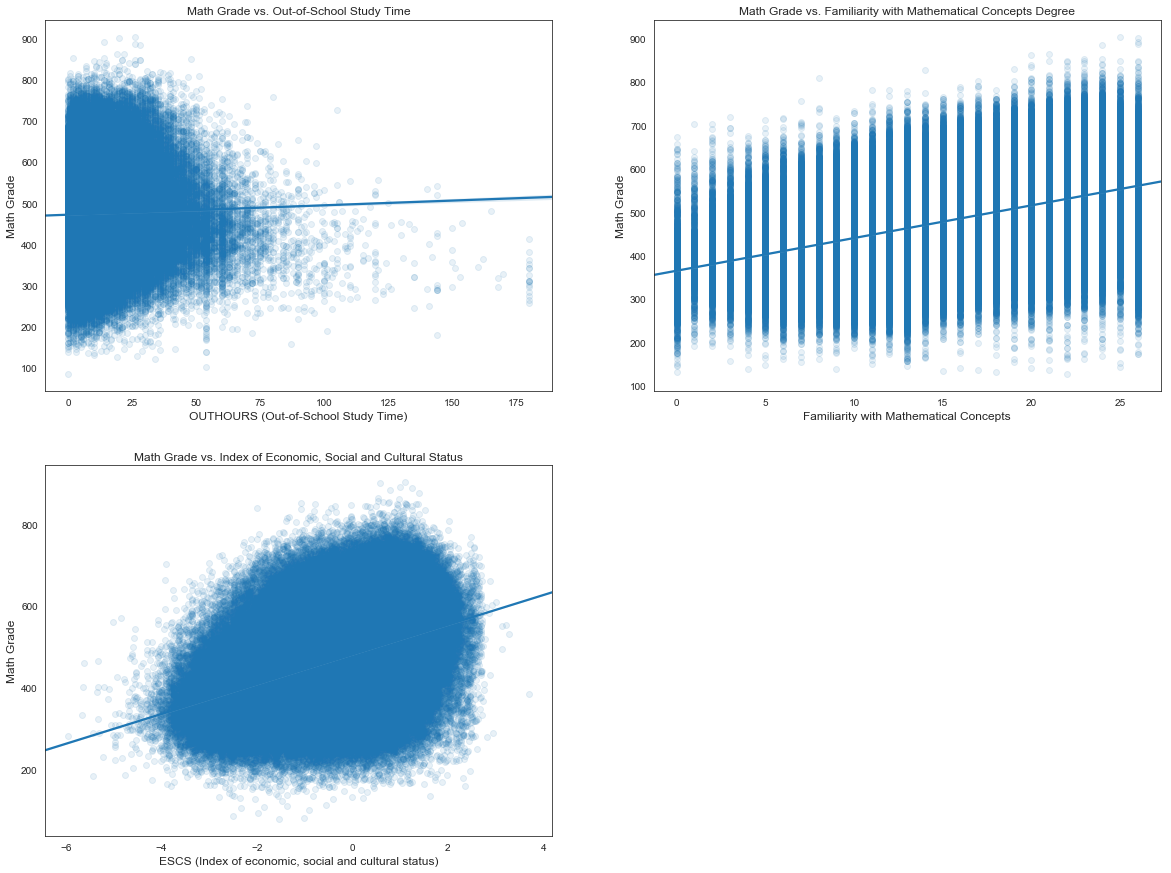

In [5]:
base_color = sb.color_palette()[0]
fig, axs = plt.subplots(2, 2,figsize=(20, 15))

sb.regplot(data=df_pisa, x='OUTHOURS',y='PVMATH',ax=axs[0,0],scatter_kws={'alpha':0.1})
axs[0,0].set_xlabel("OUTHOURS (Out-of-School Study Time)",fontsize=12)
axs[0,0].set_title('Math Grade vs. Out-of-School Study Time',fontsize=12)
axs[0,0].set_ylabel("Math Grade",fontsize=12)

sb.regplot(data=df_pisa, x='fm_degree_total', y='PVMATH',ax=axs[0,1],color=base_color,scatter_kws={'alpha':0.1})
axs[0,1].set_xlabel("Familiarity with Mathematical Concepts",fontsize=12)
axs[0,1].set_title('Math Grade vs. Familiarity with Mathematical Concepts Degree',fontsize=12)
axs[0,1].set_ylabel("Math Grade",fontsize=12)

sb.regplot(data=df_pisa, x='ESCS', y='PVMATH',ax=axs[1,0], color=base_color,scatter_kws={'alpha':0.1})
axs[1,0].set_title('Math Grade vs. Index of Economic, Social and Cultural Status', fontsize=12)
axs[1,0].set_xlabel("ESCS (Index of economic, social and cultural status)",fontsize=12)
axs[1,0].set_ylabel("Math Grade",fontsize=12)

fig.delaxes(axs[1,1])

#Lets have a look at the correlation coefficient of each above predictor with math grade
print("(Out-of-School Study Time): " + str(df_pisa['OUTHOURS'].corr(df_pisa['PVMATH'])))
print("(Familiarity with Mathematical Concepts) " + str(df_pisa['fm_degree_total'].corr(df_pisa['PVMATH'])))
print("(Index of economic, social and cultural status): " + str(df_pisa['ESCS'].corr(df_pisa['PVMATH'])))

## Familiarity with Math Concepts vs. OUTHOURS, ESCS

From the below scattor plots, we see a very week positive relationship between study hours and familiarity indicator (0.18). Also, a very week positive relation between familiarity with math concepts and Index of economic, social and cultural status (0.2)

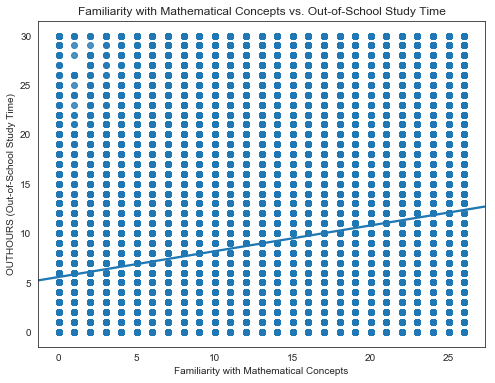

0.18582914403122788


In [6]:
plt.figure(figsize = [8, 6])
df_pisa_sub = df_pisa[df_pisa['OUTHOURS']<=30]
sb.regplot(data=df_pisa_sub,x='fm_degree_total',y='OUTHOURS')
plt.xlabel("Familiarity with Mathematical Concepts")
plt.title('Familiarity with Mathematical Concepts vs. Out-of-School Study Time')
plt.ylabel("OUTHOURS (Out-of-School Study Time)")
plt.show()

print(str(df_pisa['fm_degree_total'].corr(df_pisa['OUTHOURS'])))

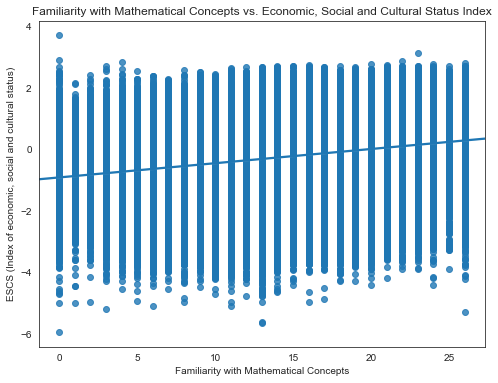

0.22750717274294296


In [7]:
plt.figure(figsize = [8, 6])
sb.regplot(data=df_pisa,x='fm_degree_total',y='ESCS')
plt.xlabel("Familiarity with Mathematical Concepts")
plt.title('Familiarity with Mathematical Concepts vs. Economic, Social and Cultural Status Index')
plt.ylabel("ESCS (Index of economic, social and cultural status)")
plt.show()

print(str(df_pisa['fm_degree_total'].corr(df_pisa['ESCS'])))

In [8]:
fam_math_dic = {
    'ST62Q01' : 'Exponential Function',
    'ST62Q02' : 'Divisor',
    'ST62Q03' : 'Quadratic Function',
    'ST62Q06' : 'Linear Equation',
    'ST62Q07' : 'Vectors',
    'ST62Q08' : 'Complex Number',
    'ST62Q09' : 'Rational Number',
    'ST62Q10' : 'Radicals',
    'ST62Q12' : 'Polygon',
    'ST62Q15' : 'Congruent Figure',
    'ST62Q16' : 'Cosine',
    'ST62Q17' : 'Arithmetic Mean',
    'ST62Q19' : 'Probability'
}

familiarity_level = ['Never heard of it', 'Heard of it often',
                    'Heard of it a few times','Heard of it once or twice',
                    'Know it well,  understand the concept']

level_labels = ['Never heard of it','Heard of it','Know it well, understand the concept']

In [9]:
df_fam_math = pd.read_csv(fm_math_data)
math_subjects = df_fam_math['math_subject'].unique()
color_palette = sb.color_palette("Paired", n_colors=13)


## What are the most familiar math concepts?

From the below stacked barchart, we see that the most familiar math concepts are (Divisor,Linear Equation,Rational Number, Radicals, Ploygon, and Probability), while the least familiarity topics are Exponential Function, complex numbers and vector. In addition to that, "Heard of it" answer has the highest frequency among students.

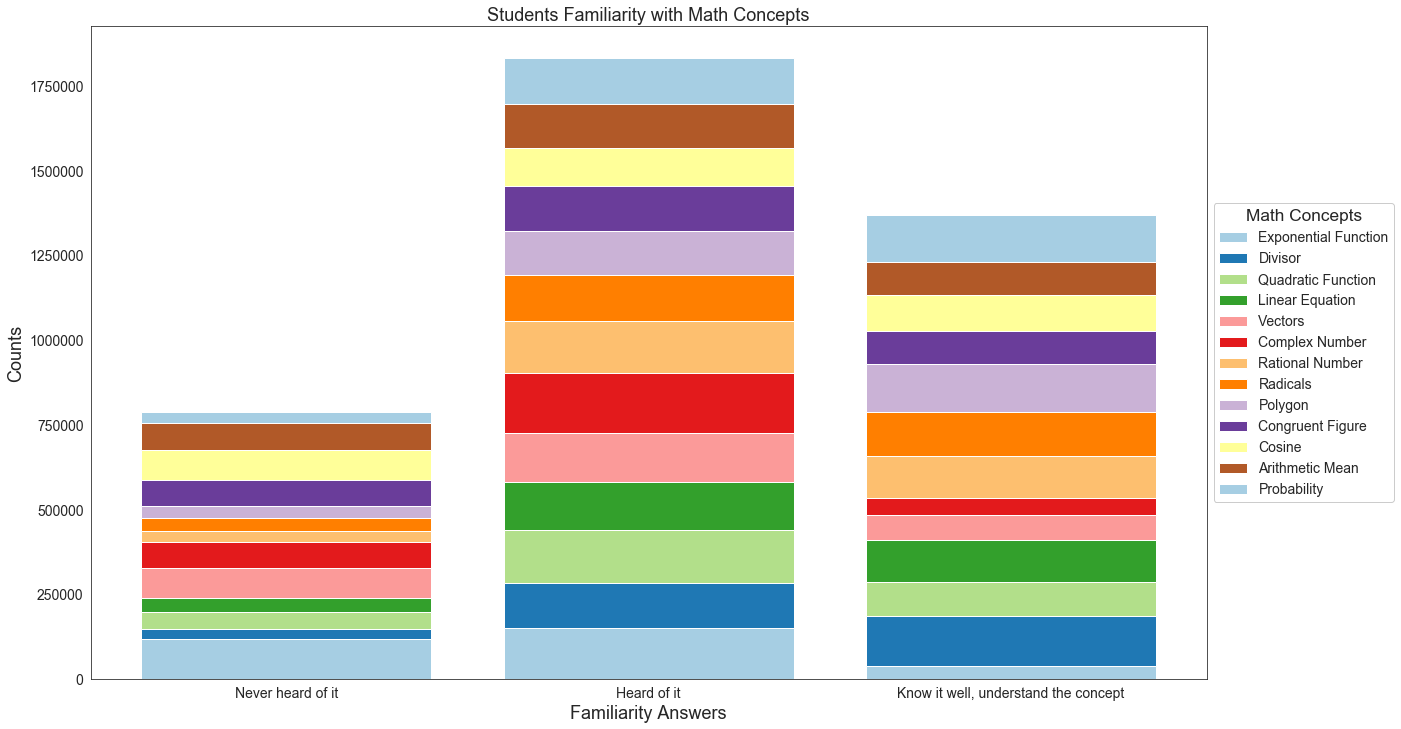

In [10]:
fig = plt.figure(figsize = [20,12])

cat1_order = [0,1,2]
baselines = np.zeros(len(level_labels))


# for each second-variable category:
for i in range(len(math_subjects)):
    # isolate the counts of the first category,
    math_subject = math_subjects[i]
    inner_counts = df_fam_math[df_fam_math['math_subject'] == math_subject]['familierity_degree'].value_counts()
    
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(level_labels)), height = inner_counts[cat1_order],
            bottom = baselines, color = color_palette[i] )
    
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), level_labels, fontsize=14)
plt.yticks(fontsize=14)
leg = plt.legend(fam_math_dic.values(), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6, fontsize=14);

plt.xlabel("Familiarity Answers", fontsize=18)
plt.ylabel("Counts", fontsize=18)
plt.title("Students Familiarity with Math Concepts",fontsize=18 )
leg.set_title("Math Concepts", prop = {'size':'xx-large'})

In [11]:
escs_heights, escs_bins = np.histogram(df_pisa.ESCS[~df_pisa['ESCS'].isnull()], bins = 7)
df_pisa["ESCS_bk"] = None
df_pisa["ESCS_bk"] = pd.cut(df_pisa.ESCS, bins= escs_bins)

In [12]:
fm_heights, fm_bins = np.histogram(df_pisa.fm_degree_total[~df_pisa['fm_degree_total'].isnull()], bins = 7)
df_pisa["fm_degree_total_bk"] = None
df_pisa["fm_degree_total_bk"] = pd.cut(df_pisa.fm_degree_total, bins= fm_bins)

## Students Math Grades per Familiarity Level & ESCS

From the chart we see that students with high ESCS will have higher math grades than studetnst with low ESCS. Also, for each ESCS group we see students with high familiarity in all math concepts have higher math grades than students with low familiarity.

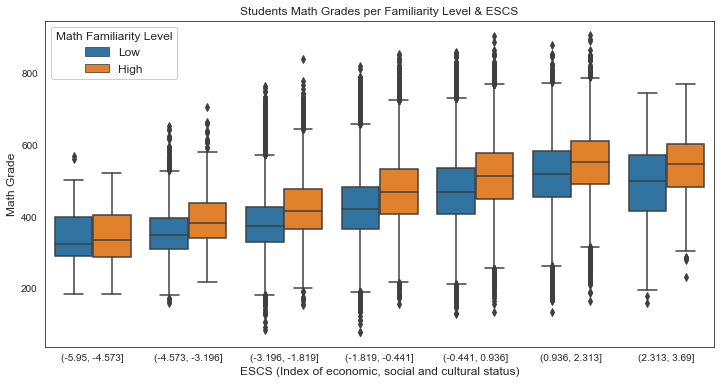

In [13]:
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_pisa,x="ESCS_bk",y='PVMATH',hue="fm_degree_ca")
leg = ax.legend(framealpha = 1, fontsize=12, loc = 0);
leg.set_title("Math Familiarity Level", prop = {'size':'large'})
plt.xlabel("ESCS (Index of economic, social and cultural status)", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Familiarity Level & ESCS",fontsize=12)

plt.show()

## Math Grades per Familiarity in Math Concepts & Students Gender

The chart displays that male students have higher median that female studnets for each familiarity group. 

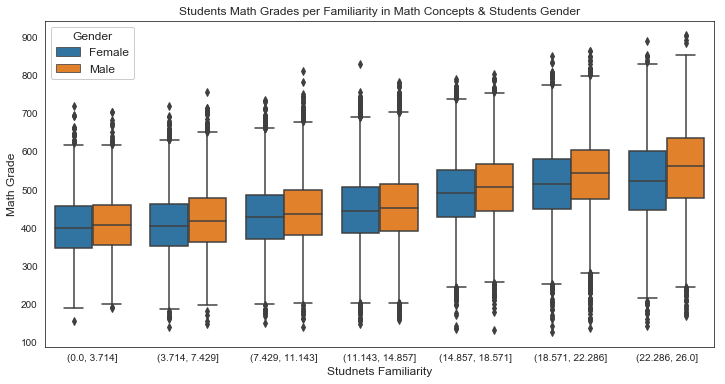

In [14]:
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_pisa,x="fm_degree_total_bk",y='PVMATH',hue="ST04Q01")
leg = ax.legend(framealpha = 1, fontsize=12, loc = 0);
leg.set_title("Gender", prop = {'size':'large'})
plt.xlabel("Studnets Familiarity", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Familiarity in Math Concepts & Students Gender",fontsize=12)

plt.show()

In [15]:
countries = ['Tunisia', 'Jordan', 'Qatar', 'Israel', 'Turkey', 'United Arab Emirates']
df_cnt_sub = df_pisa[df_pisa.CNT.isin(countries)]

## What is the students performance in math in these six countries (Tunisia, Jordan, Qatar, Israel, Turkey, United Arab Emirates)?


### Students Familiarity , Out of School Study Time, ESCS, Math grade by country

For Students Familiarity, we see students from Jordan have the highest medien, and its sutdenst records the higher familiairity comparing to other countries. 

In out-of-school study time, we see that students from UAE records a higher study hours after school than other countries which have similar distribution

For , the plot shows that UAE, Isreal, and Qatar have almost a similar median which is higher than the third quanitle of both Turkey and Tunisia

Lastly, Math grade plot shows that Isreal has the highest median followed by both Turkey and UAE. 

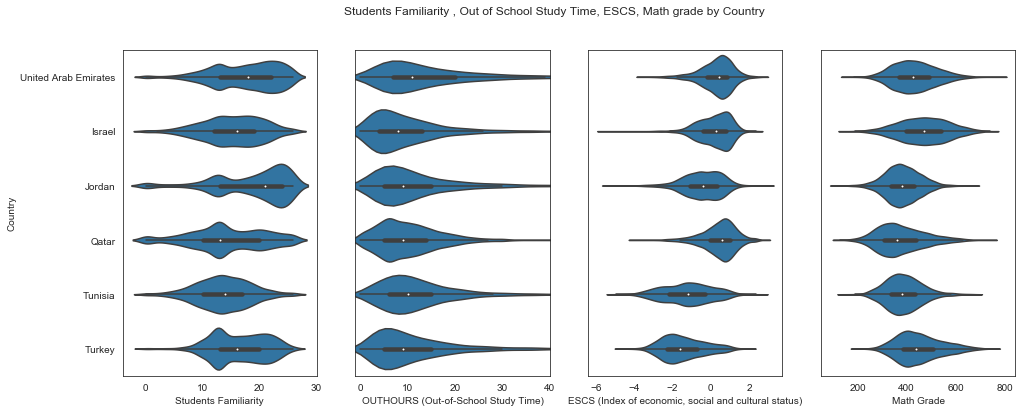

In [16]:
color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 4, figsize = [16,6])
sb.violinplot(data = df_cnt_sub, y = 'CNT', x = 'fm_degree_total', ax = ax[0],
              color = color)

ax[0].set_xlabel("Students Familiarity")
ax[0].set_ylabel("Country".capitalize())


sb.violinplot(data = df_cnt_sub, y = 'CNT', x = 'OUTHOURS', ax = ax[1],
              color = color)

ax[1].set_xlabel("OUTHOURS (Out-of-School Study Time)")
ax[1].set_yticklabels([""])
ax[1].set_xlim([-1,40])
ax[1].set_ylabel("")

sb.violinplot(data = df_cnt_sub, y = 'CNT', x = 'ESCS', ax = ax[2],
              color = color)

ax[2].set_xlabel("ESCS (Index of economic, social and cultural status)")
ax[2].set_yticklabels([""])
ax[2].set_ylabel("")

sb.violinplot(data = df_cnt_sub, y = 'CNT', x = 'PVMATH', ax = ax[3],
              color = color)

ax[3].set_xlabel("Math Grade")
ax[3].set_yticklabels([""])
ax[3].set_ylabel("")

fig.suptitle('Students Familiarity , Out of School Study Time, ESCS, Math grade by {}'.format("Country".capitalize()))
plt.show()

## Students Math Grades in these Countries Grouped by ESCS

From the below chart, we see the following: 
- The lowest ESCS group (-5.95, -4.753] includes only two countries (Tunisia and Jordan)
- No participants from Turkey country fall in ESCS group (2.313, 3.69] 
- For each ESCS group (-4.573, 2.313], Turkish students have the highest math grade median comparing to students from other countries 
- The most impresive insight is that students who fall in the highest ESCS group don't have higher math grades comparing to those who fall in (0.936,2.313) ESCS group except students from UAE have higher average math grade in (2.3, 3.6] that those in (0.9, 2.3]
- Most of outliers in Isreal country are for low math grade.

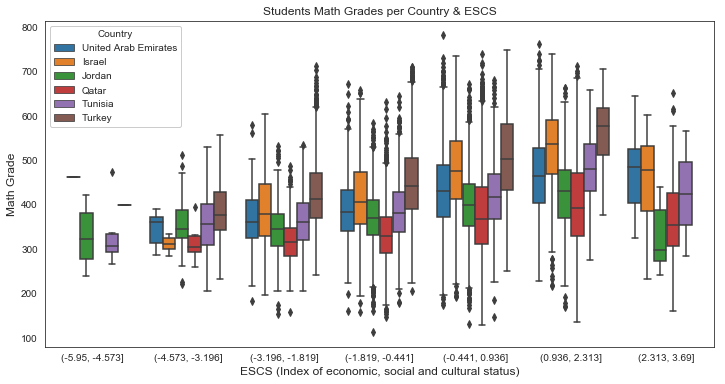

In [17]:
#how ESC of these countries have an affect over math grade
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_cnt_sub,x="ESCS_bk",y='PVMATH',hue="CNT")
leg = ax.legend(framealpha = 1, loc = 0);
leg.set_title("Country")
plt.xlabel("ESCS (Index of economic, social and cultural status)", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Country & ESCS",fontsize=12)

plt.show()

In [18]:
df_cnt_sub["OUTHOURS_bk"] = None
df_cnt_sub["OUTHOURS_bk"]  =pd.cut(df_cnt_sub.OUTHOURS, bins = [0, 2,4,5,7,8,10,12, 15, 30])

## Students Math Grades in these Countries Groupbed by (Out-of-School Study Time)
The below plot shows clearly that out-of-school study time doesn't have any mentioned effect on students math grade. Moreover, It is obviously that for each time group, studnets from Isreal have the highest math grade median. 

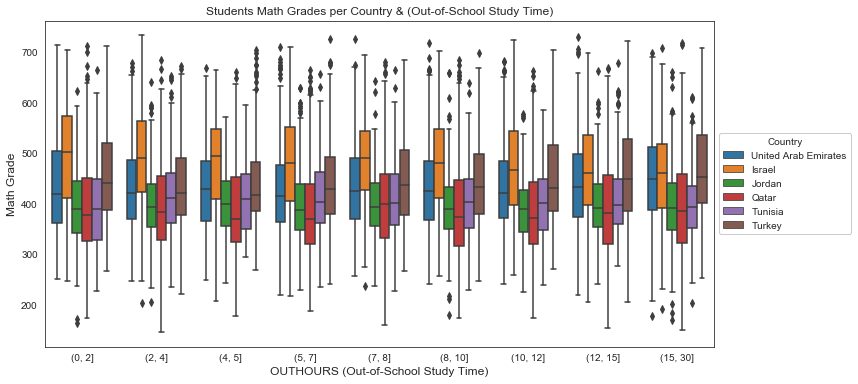

In [19]:
#how ESC of these countries have an affect over math grade
fig = plt.figure(figsize = [12,6])
ax = sb.boxplot(data=df_cnt_sub,x="OUTHOURS_bk",y='PVMATH',hue="CNT")
leg = ax.legend(framealpha = 1, loc = 6,bbox_to_anchor = (1, 0.5));
leg.set_title("Country")
plt.xlabel("OUTHOURS (Out-of-School Study Time)", fontsize=12)
plt.ylabel("Math Grade", fontsize=12)
plt.title("Students Math Grades per Country & (Out-of-School Study Time)",fontsize=12)

plt.show()